<a href="https://colab.research.google.com/github/khatriprajwol/Data-Visualization-/blob/main/Recreating%20The%20Master%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TOP 20 MOST VALUABLE SOCCER TEAMS(2016)**
#**Project: Recreating the Master**
#**Prajwol Khatri**




Here I would lke to present you one of my favorite topic again which is related to sport. In this project it focuses on top twenty most valuable soccer team over the year and how it changed. However, I will be recreting only one of it. Well, recreating masters work will not be easy but I will try my best. 

![Picture1](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes2.jpg)


The above visualization is from 2016 but I would like to create similar master piece with a current data. In order to make similar visualization I will need the name of a club and its information. I tried to search data through **ESPN** but I could not find it. Therefore my alternative option was [wikipedia](https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs).




![Picture2](https://www.adifferentleague.co.uk/wp-content/uploads/2016/05/juve-forbes.jpg)






Here is another diagram. As we can see the change in percentage from 2015 to 2016. Can we see any change? Yes, indeed. Let's see what we can expect in 2021. Well, the graph below shows the information how it changed in another year.

![Picture](https://www.statista.com/graphic/1/300578/team-value-of-soccer-teams.jpg)

The above graph can be found in this [link]("https://www.statista.com/statistics/300578/team-value-of-soccer-teams/"). I think this graph did not do a great job in visualization. No doubtt it provides the information but still not a great visualization. 


#**THE GRAPH I WILL BE RECREATING**
I am planning to use one of the first graph i.e. `Top 20 Most Valuable Soccer Team (2016)`. It looks a great visualization to me. In my graph it will not have **color key** because the data I have found associated with it do not contain the information about it. Hence, I would like to say my work as a recreating of some of master's work. 

#**Libraries Used**

In [398]:
import numpy as np #a matrix like package for handling data
import pandas as pa #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt #a way to generate plots, histograms, bar charts, and other types of charts 
import seaborn as sns #it is based on matplotlib
import requests #HTTP library
import pandas as pd # used to manipulate data and analyze it
from bs4 import BeautifulSoup #Used for a web scraping purposes to pull the data out of HTML and XML files
import re #Used for regular expression in Python.


#**Panda as a Dataframe**

In [399]:
r = requests.get('https://en.wikipedia.org/wiki/Forbes%27_list_of_the_most_valuable_football_clubs')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

17

#**Table**

In [400]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[5]
df

,Rank,Team,Country,Value ($M)[10],Debt as% of value[8],% changeon year,Revenue ($M)
0,1,Real Madrid,Spain,3645,3,12.0,694
1,2,Barcelona,Spain,3549,2,12.0,675
2,3,Manchester United,England,3317,20,7.0,625
3,4,Bayern Munich,Germany,2678,0,14.0,570
4,5,Arsenal,England,2017,17,54.0,524
5,6,Manchester City,England,1921,0,40.0,558
6,7,Chelsea,England,1661,0,21.0,505
7,8,Liverpool,England,1548,5,58.0,471
8,9,Juventus,Italy,1299,4,55.0,390
9,10,Tottenham Hotspur,England,1017,2,69.0,310


It is not a big data set but a perfect for me to recreate the above visualization. 
[link](https://github.com/nurfnick/Data_Viz/blob/main/RecreatingMasters.ipynb) Here, I am going to need to do lot of cleaning for the columns. 


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  20 non-null     int64  
 1   Team                  20 non-null     object 
 2   Country               20 non-null     object 
 3   Value ($M)[10]        20 non-null     int64  
 4   Debt as% of value[8]  20 non-null     int64  
 5   % changeon year       19 non-null     float64
 6   Revenue ($M)          20 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ KB


The command **df.info()** helps me find **dtype**. There are four integer data, two object and one float. Also, I need to do lot of cleanings of my columns. You can see there are extra information which will make my visualization less effective.

In [402]:
df.isnull()

,Rank,Team,Country,Value ($M)[10],Debt as% of value[8],% changeon year,Revenue ($M)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


It is crucial for me to understand the type of data which I am dealing with. In my previous command you have seen me using **info()** and here in this table I have used **df.isnull()** to see if I have any null values otherwise I would need to put them in my cleaning list. As you can also see there is one **True** value returned but it is not a data which I will need to clean. Therefore, I will move ahead with my cleaning of columns. 

#**Data Cleaning**
Here, I need to do lot of cleanings of my columns. You can see there are extra information which will make my visualization less effective.

In [403]:
df.columns

Index(['Rank', 'Team', 'Country', 'Value ($M)[10]', 'Debt as% of value[8]',
       '% changeon year', 'Revenue ($M)'],
      dtype='object')

Instead of going back and looking at my table columns name, I am running **df.columns** to list all the columns in my data. We can always go back and look at the columns name. However, df.columns just saves us lot of time and makes our job easier. Here, we can see there are [], (), %. Let's clean (%) part from the column and any other special character between them. 

In [404]:
cols = df.columns.map(lambda s: re.sub(r"[.\d[(.$M%\d)\]]","",s))
cols

Index(['Rank', 'Team', 'Country', 'Value ', 'Debt as of value',
       ' changeon year', 'Revenue '],
      dtype='object')

I have used **RegEx** package to clean my data. It took me a while to do this but surprisingly I figured it out. At first I tried it without () which gave me a pain in my head. However, after putting the brackets it seems to be working.

In [405]:
df.columns = df.columns.map(lambda s: re.sub(r"[.\d[(.$M%\d)\]]","",s))

Now, I will apply this to my old table. Let's see if my data is cleaned properly. 

In [406]:
df.columns

Index(['Rank', 'Team', 'Country', 'Value ', 'Debt as of value',
       ' changeon year', 'Revenue '],
      dtype='object')

There is still a space between world, I will go ahead and clean those as well. 

In [407]:
cols1 = df.columns.map(lambda s: re.sub(r" ","",s))
cols1

Index(['Rank', 'Team', 'Country', 'Value', 'Debtasofvalue', 'changeonyear',
       'Revenue'],
      dtype='object')

In [408]:
df.columns = df.columns.map(lambda s: re.sub(r" ","",s))

In [409]:
df.columns

Index(['Rank', 'Team', 'Country', 'Value', 'Debtasofvalue', 'changeonyear',
       'Revenue'],
      dtype='object')

Now, I will apply this to my old table. I believe, now I have my table to do some visualization.

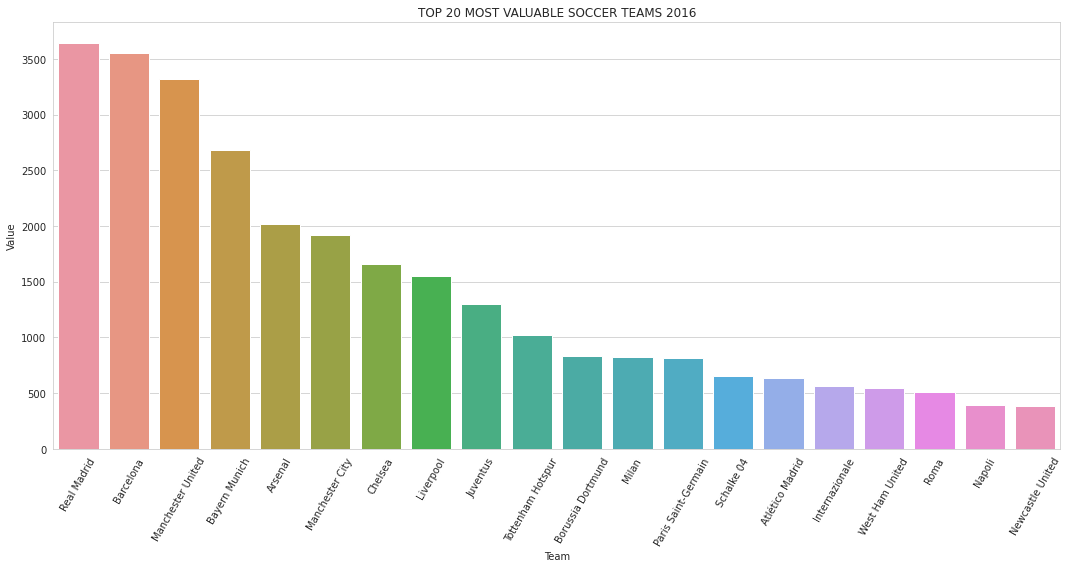

In [410]:
ax = sns.barplot(data = df, x = 'Team', y= "Value", ci= None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS 2016')
plt.show()

It looks like a right size to me but not the color I am expecting it to be. I want to have it light blue like my masters graph. So, I will try to play around with the color. 

Well, the graph does not quick looks like that. But I will try to do it in a different way. Let's see if it will work. 

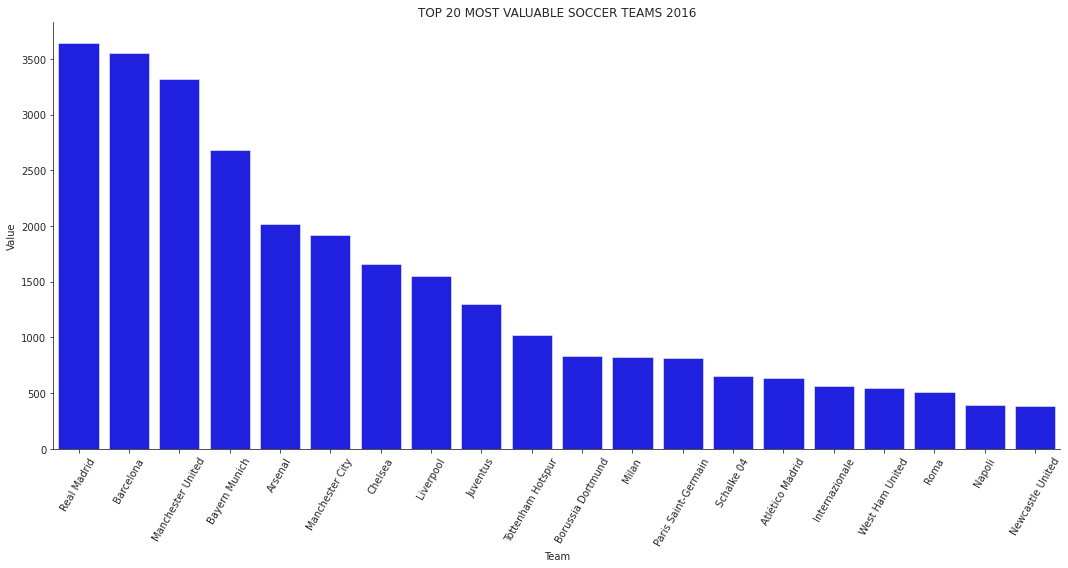

In [411]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'Blue', ci= None, linewidth= 0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS 2016')
sns.despine()
plt.show()

WOw! The color is way too dark. All the bars now have even color but still it is not what I am expecting it to be. 

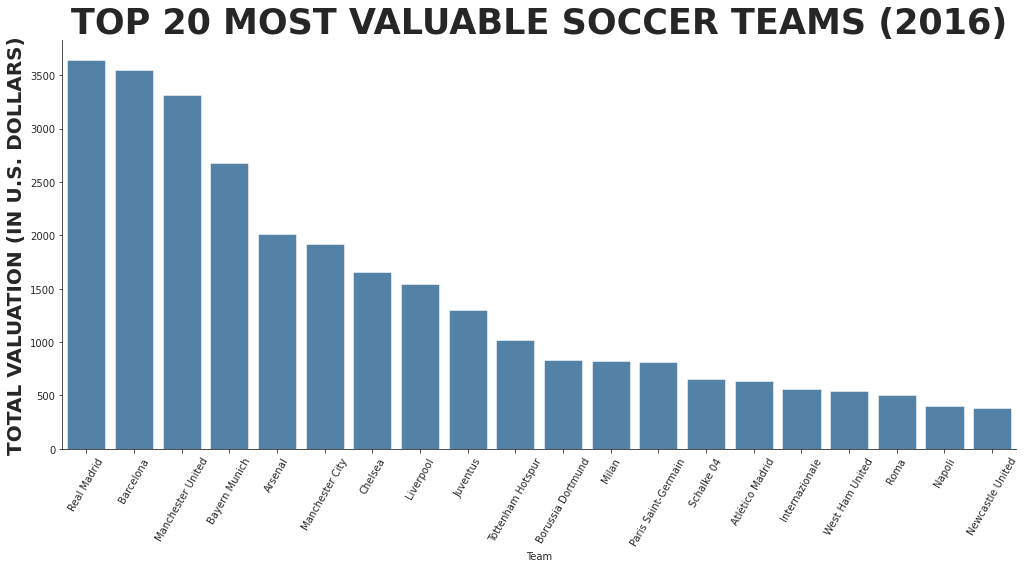

In [412]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'steelblue', ci= None, linewidth = 0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS (2016)',size = float(35.0), fontweight = 'bold')
ax.set_ylabel("TOTAL VALUATION (IN U.S. DOLLARS)", size = float(20.0), fontweight = 'bold')
sns.despine()
plt.show()

I have changed the color from **dark blue** to **steel blue**. It started to look like the graph I am planning to create. In addition, I have also changed my font size of the title. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


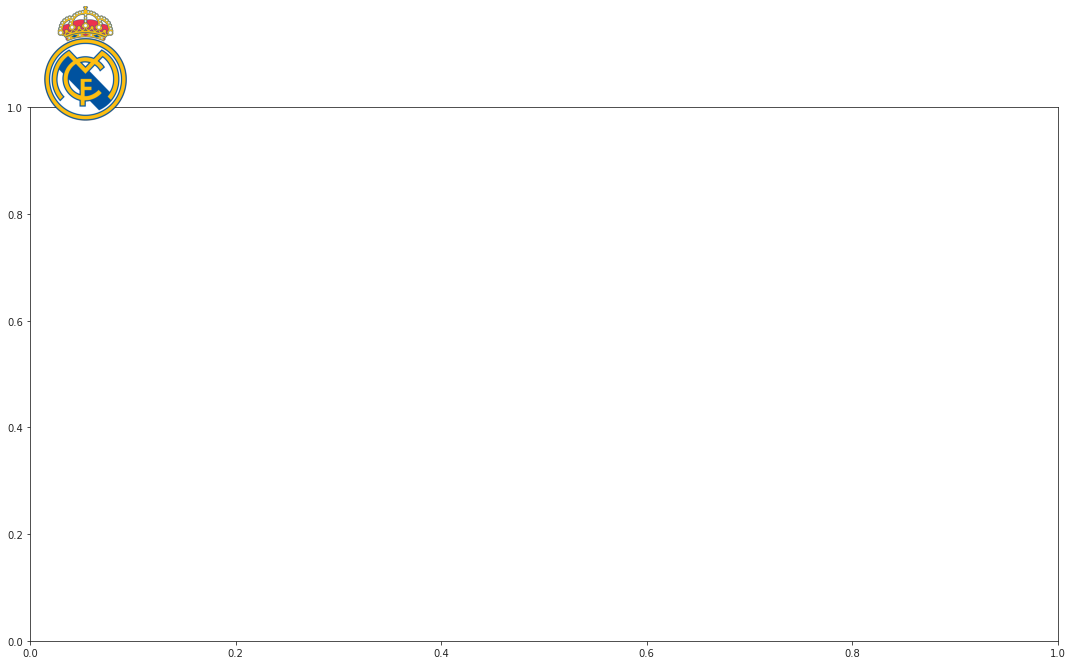

In [413]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
arr_lena = plt.imread('/content/drive/MyDrive/logos/Real_Madrid.png')
newax = fig.add_axes([-0.08,0.95,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(arr_lena)
newax.axis('off')
plt.draw()
plt.show()

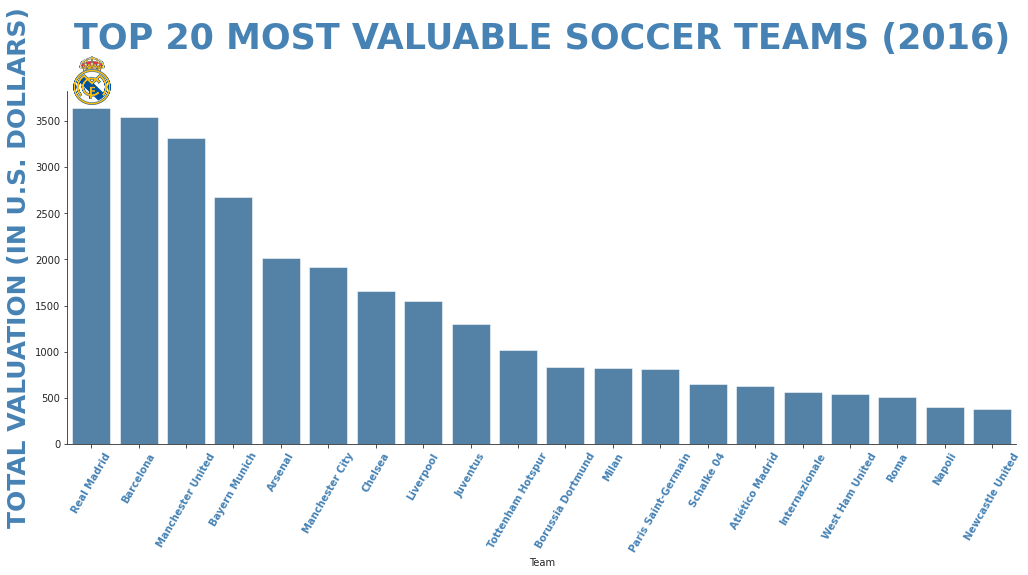

In [414]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'steelblue', ci= None, linewidth = 0.5, )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontweight = 'bold', color = 'steelblue')
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS (2016)',size = float(35.0), fontweight = 'bold', color= 'steelblue')
ax.set_ylabel("TOTAL VALUATION (IN U.S. DOLLARS)", size = float(25.0), fontweight = 'bold',  color= 'steelblue')
arr_lena= plt.imread('/content/drive/MyDrive/logos/Real_Madrid.png')
axin = ax.inset_axes([-0.125,0.96,0.1699,0.14], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()
plt.show()

Here I was able to put the **logo** in at the top of the first team and I have changed font color to the matching color. Also, I have tried to change font size for **(2016)** but I could not figure it out. 

I will need it to work for all of my graph. I think seaborn is not doing a great job to do that. I might have to use different library for that. I will go ahead and try that with numpy. Also, you can see when I use white grid the label was overlapping with my logo which means I will need to resize my logo.  

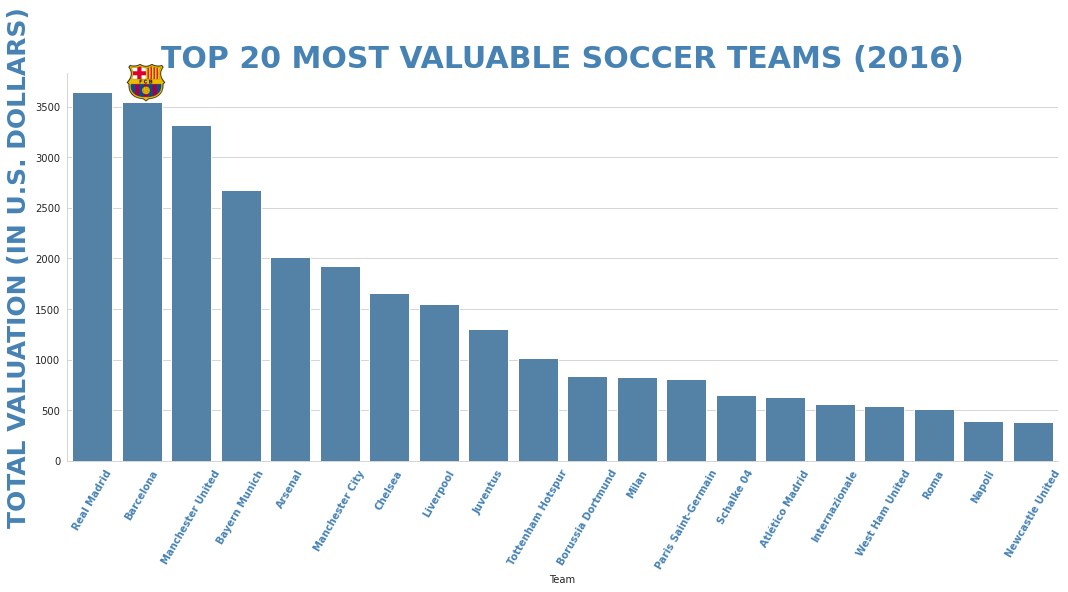

In [415]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('whitegrid')
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'steelblue', ci= None, linewidth = 1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontweight = 'bold', color = 'steelblue')
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS (2016)',size = float(30.0), fontweight = 'bold', color= 'steelblue')
ax.set_ylabel("TOTAL VALUATION (IN U.S. DOLLARS)", size = float(25.0), fontweight = 'bold',  color= 'steelblue')
arr_lena = plt.imread("/content/drive/MyDrive/logos/Barcelona.png")
axin = ax.inset_axes([0.0009,0.925,0.098,0.099], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()
plt.show()

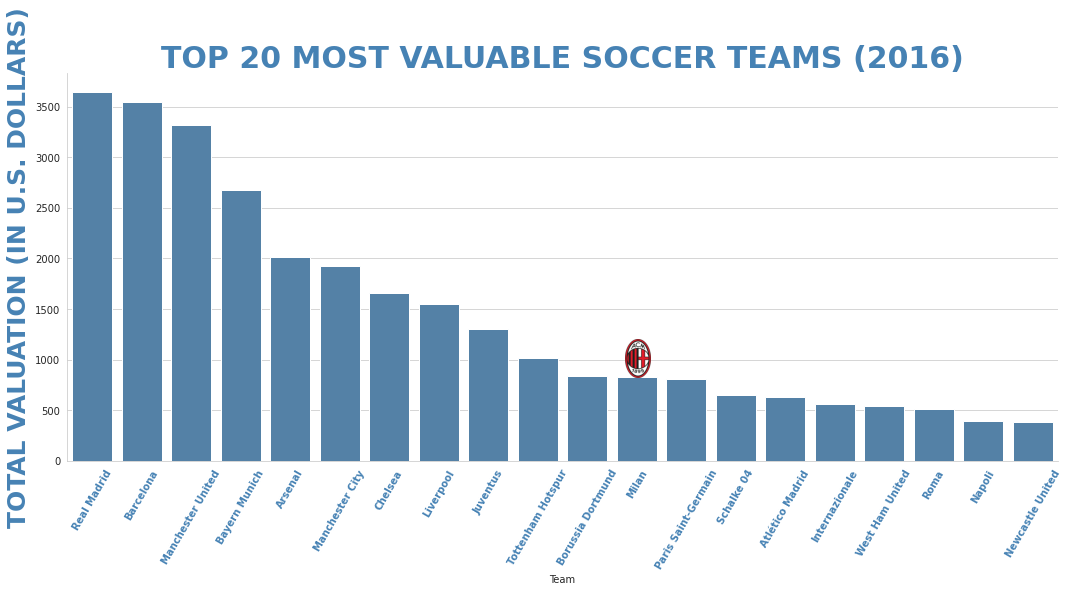

In [416]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('whitegrid')
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'steelblue', ci= None, linewidth = 1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontweight = 'bold', color = 'steelblue')
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS (2016)',size = float(30.0), fontweight = 'bold', color= 'steelblue')
ax.set_ylabel("TOTAL VALUATION (IN U.S. DOLLARS)", size = float(25.0), fontweight = 'bold',  color= 'steelblue')
arr_lena = plt.imread(f"/content/drive/MyDrive/logos/ACMilan.png")
axin = ax.inset_axes([0.49,0.215,0.099,0.099], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()
plt.show()

In my above three graphs, I was able to manipulate axis and logo size. However, I have to make it look like in one singlke graph which will not be easy. 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


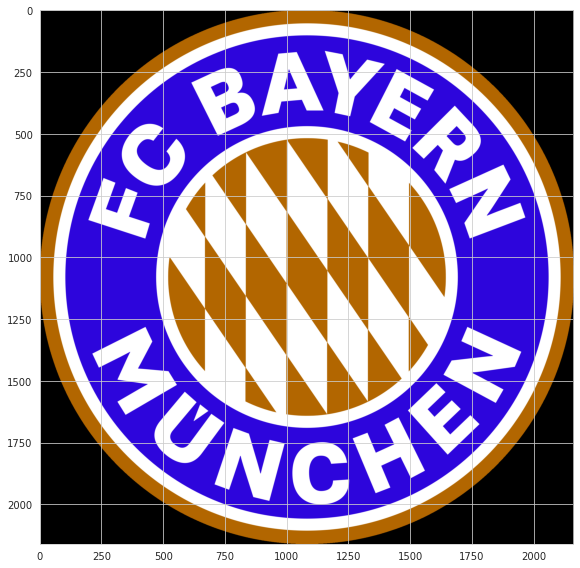

In [432]:
import matplotlib.pyplot as plt
import cv2
from skimage import transform
import numpy as np
labels={1:'Real_Madrid', 
          2:'Barcelona', 
          3:'ManchesterUnited', 
          4:'BayrenMunich', 5:'Arsenal', 
          6:'ManchesterCity', 7:'Chelsea',
          8:'Liverpool',9:'Juventus',10:'TottenhamHotspur', 11:'BorussiaDortmund',12:'Milan', 13:'ParisSaintGerman',14:'Schalke04',15:'AtleticoMadrid',16:'Internazionale',17:'WestHamUnited',18:'Roma', 19:'Nepoli',20:'NewcastleUnited'}
for keys in labels:
  print(keys) 

img_r = cv2.imread(f"/content/drive/MyDrive/logos/"+ labels[4]+".png")
plt.imshow(img_r)

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
import cv2
from skimage import transform
sns.barplot(data = df, x = 'Team', y= "Value", color= 'steelblue', ci= None, linewidth = 1)

labels= ['Real_Madrid', 
          'Barcelona', 
          'ManchesterUnited', 
          'BayrenMunich', 'Arsenal', 
          'ManchesterCity', 'Chelsea',
          'Liverpool','Juventus',
          'TottenhamHotspur', 'BorussiaDortmund'
          'Milan', 'ParisSaintGerman', 
          'Schalke04','AtleticoMadrid',
          'Internazionale','WestHamUnited','Roma', 'Nepoli','NewcastleUnited']
Value = [ 3645,3549,3317,2678,2017,1921,1661,1548,1299,1017,836,825,814,655,633,559,542,508,396, 383]        

for team in labels:
  y = df.Value
  img = cv2.imread('/content/drive/MyDrive/logos.png') #needs to be team name +".png"
imagebox = OffsetImage(arr_lena, zoom=0.1)
ab = AnnotationBbox(imagebox, (9.5), frameon = False)
fig.add_artist(ab)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.cbook as cbook
import requests
from io import BytesIO

labels= ['RealMadrid', 
          'Barcelona', 
          'ManchesterUnited', 
          'Bayern_Munich', 'Arsenal', 
          'ManchesterCity', 'Chelsea',
          'Liverpool','Juventus',
          'TottenhamHotspur', 'BorussiaDortmund'
          'Milan', 'ParisSaintGermain', 
          'Schalke04','AtleticoMadrid',
          'Internazionale','WestHamUnited','Roma', 'Nepoli','Newcastle_United']
values = [ 3645,3549,3317,2678,2017,1921,1661,1548,1299,1017,836,825,814,655,633,559,542,508,396, 383]    
values = 30 + np.random.randint(5, 20, len(labels)).cumsum()

height = 0.9
ax = sns.barplot(data = df, x = 'Team', y= "Value", color= 'steelblue', ci= None, linewidth = 1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontweight = 'bold', color = 'steelblue')
ax.set_title('TOP 20 MOST VALUABLE SOCCER TEAMS (2016)',size = float(30.0), fontweight = 'bold', color= 'steelblue')
ax.set_ylabel("TOTAL VALUATION (IN U.S. DOLLARS)", size = float(25.0), fontweight = 'bold',  color= 'steelblue')
Image=(labels+".png")
for i, (label, value) in enumerate(zip(labels, values)):
    #load the image corresponding to label into img
    #with cbook.get_sample_data('ada.png') as image_file:
      #img = plt.imread(image_file)
    response = requests.get(f"https://github.com/khatriprajwol/{Image}")
    img = plt.imread(BytesIO(response.content))
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
plt.xlim(0, max(values) * 1.05)
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout()
plt.show()

In [431]:
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import numpy.ravel
Team = ['Real_Madrid', 
          'Barcelona', 
          'Manchester_United', 
          'Bayern_Munich', 'Arsenal', 
          'Manchester_City', 'Chelsea',
          'Liverpool','Juventus',
          'Tottenham_Hotspur', 'Borussia_Dortmund'
          'Milan', 'Paris_Saint-Germain', 
          'Schalke_04','Atletico_Madrid',
          'Internazionale','West_Ham_United','Roma', 'Nepoli','Newcastle_United']
Value = [ 3645,3549,3317,2678,2017,1921,1661,1548,1299,1017,836,825,814,655,633,559,542,508,396, 383]    
def get_logo(name):
    path = "/content/drive/MyDrive/logos"
    im = plt.imread()
    print('im')

def offset_image(coord, name, ax):
    img = get_logo(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax
ab = AnnotationBbox(im, (coord, 5),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
axe = axes.ravel()
ax.add_artist(ab)
ax.set_title("NHL {} Division 2022".format(Team))
ax.set(xlabel = 'Games')

plt.show()

    

fig, ax = plt.subplots()
ax.bar(range(len(Team)), Value, width=0.5,align="center")
ax.set_xticks(range(len(Team)))
ax.set_xticklabels(Team)
ax.tick_params(axis='x', which='major', pad=26)

for i, c in enumerate(Team):
    offset_image(i, c, ax)

plt.show()


ModuleNotFoundError: ignored